In [29]:
import pandas as pd
import numpy as np
import pickle
import patsy
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [63]:
emp_df = pd.read_csv('HR_comma_sep 2.csv')
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [64]:
emp_df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [65]:
emp_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [66]:
emp_df = emp_df.rename(index=str, columns={'average_montly_hours': 'average_monthly_hours'})

In [67]:
emp_df.shape

(14999, 10)

In [68]:
emp_df.columns = emp_df.columns.str.strip()

In [69]:
pandas_profiling.ProfileReport(emp_df)

Number of variables,11
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),1
Rejected,0


### Baseline model 
- Dropped 'sales' and 'salary' as they are currently strings

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y = emp_df['left']
X = emp_df.drop(columns=['left', 'sales', 'salary'])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
lr.score(X_test, y_test)

0.757

In [44]:
from sklearn.metrics import f1_score

In [45]:
y_pred = lr.predict(X_test)

In [46]:
f1_score(y_test, y_pred)

0.3063748810656518

### Feature Engineering
- Converting Sales and Salary columns to numeric data
- Interaction terms


In [70]:
emp_df.groupby('sales').nunique()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
sales,,,,,,,,,,
IT,90,64,6,195,8,2,2,2,1,3
RandD,90,65,6,175,6,2,2,2,1,3
accounting,90,64,6,178,7,2,2,2,1,3
hr,90,63,6,176,6,2,2,2,1,3
management,86,62,6,163,8,2,2,2,1,3
marketing,90,64,6,181,8,2,2,2,1,3
product_mng,88,65,6,182,8,2,2,1,1,3
sales,92,65,6,214,8,2,2,2,1,3
support,92,65,6,204,7,2,2,2,1,3


In [71]:
emp_df['salary'] = emp_df['salary'].map( {'high':3 ,'medium': 2, 'low': 1} ).astype(int)

In [72]:
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [73]:
dummy = pd.get_dummies(emp_df['sales'], drop_first=True)

In [74]:
emp_df = pd.concat([emp_df, dummy], axis=1)

In [75]:
emp_df = emp_df.drop(['sales'], axis=1)

In [76]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 17 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
RandD                    14999 non-null uint8
accounting               14999 non-null uint8
hr                       14999 non-null uint8
management               14999 non-null uint8
marketing                14999 non-null uint8
product_mng              14999 non-null uint8
support                  14999 non-null uint8
technical                14999 non-null uint8
dtypes: float64(2), int64(7), uint8(8)
memory usage: 1.3+ MB


In [77]:
emp_df = emp_df.drop(columns=['left']).assign(left=emp_df['left'])

In [78]:
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,left
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,0,1
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,0,1
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,0,1


In [55]:
emp_df.to_pickle('emp_df_clean')

# patsy here

In [142]:
%matplotlib inline

In [143]:
sns.set(style='white')

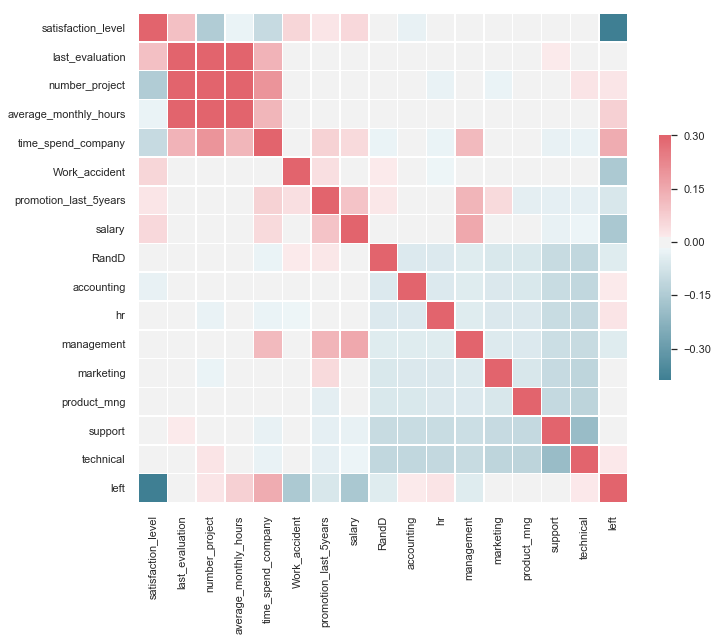

In [144]:
corr = emp_df.corr()
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, cbar_kws={'shrink': .5}, 
           linewidths=.5);

Correlation matrix findings
- average monthly hours, time spent at company = positively correlated with leaving
- satisfaction level, work accident, salary = negatively correlated with leaving

Therefore:
- The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
- The average monthly work hours of employees who left the company is more than that of the employees who stayed.
- The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
- The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

In [145]:
# average monthly hours Vs leaving

hours = emp_df[['left', 'average_monthly_hours']].groupby(['left'], as_index=False).mean().sort_values(by='average_monthly_hours', ascending=False)
hours

,left,average_monthly_hours
1,1,207.419210
0,0,199.060203


In [146]:
# average years at company Vs leaving

years1 = emp_df[['left', 'time_spend_company']].groupby(['left'], as_index=False).mean().sort_values(by='time_spend_company', ascending=False)
years2 = emp_df[['left', 'time_spend_company']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='left', ascending=False)

In [147]:
years1

,left,time_spend_company
1,1,3.876505
0,0,3.380032


In [148]:
years2

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


In [149]:
# average satisfaction Vs leaving

satisfaction = emp_df[['left', 'satisfaction_level']].groupby(['left'], as_index=False).mean().sort_values(by='satisfaction_level', ascending=False)
satisfaction

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


In [150]:
#average salary Vs leaving

salary1 = emp_df[['left', 'salary']].groupby(['left'], as_index=False).mean().sort_values(by='salary', ascending=False)
salary2 = emp_df[['left', 'salary']].groupby(['salary'], as_index=False).mean().sort_values(by='left', ascending=False)

In [151]:
salary1

,left,salary
0,0,1.650945
1,1,1.414730


In [152]:
salary2

,salary,left
0,1,0.296884
1,2,0.204313
2,3,0.066289


In [153]:
#average work accident Vs leaving

accident1 = emp_df[['left', 'Work_accident']].groupby(['left'], as_index=False).mean().sort_values(by='Work_accident', ascending=False)
accident2 = emp_df[['left', 'Work_accident']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='left', ascending=False)

In [154]:
accident1

,left,Work_accident
0,0,0.175009
1,1,0.047326


In [155]:
accident2

,Work_accident,left
0,0,0.265160
1,1,0.077916


In [156]:
from scipy import stats

In [157]:
stats.ttest_ind(emp_df.last_evaluation, emp_df.number_project)

Ttest_indResult(statistic=-303.8042100031241, pvalue=0.0)

In [158]:
stats.ttest_ind(emp_df.last_evaluation, emp_df.average_monthly_hours)

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)

In [159]:
stats.ttest_ind(emp_df.number_project, emp_df.average_monthly_hours)

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)

Correlations of these 3 variables are statistically significant therefore create interaction term

In [160]:
emp_df['project_hours_eval'] = emp_df['last_evaluation']*emp_df['number_project']*emp_df['average_monthly_hours']

In [161]:
emp_df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,support,technical,left,project_hours_eval
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,0,1,166.42
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,0,0,1,1126.60
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,0,0,1,1675.52
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,0,1,970.05
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,0,1,165.36


Test model with new features. First split and standard scale

In [175]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=43)

In [176]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train.values)
# X_val_scaled = scaler.transform(X_val.values)
# X_test_scaled = scaler.transform(X_test.values)

In [177]:
# X_train_val = np.concatenate([X_train_scaled, X_val_scaled], axis=0)


In [178]:
# y_train_val = pd.concat([y_train, y_val])

In [162]:
y = emp_df['left']
X = emp_df.drop(columns=['left'])

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
lr = LogisticRegression()

In [165]:
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
lr.score(X_test, y_test)

0.9053333333333333

In [167]:
y_pred = lr.predict(X_test)

In [168]:
f1_score(y_test, y_pred)

0.7871064467766117

### Checking class imbalance

In [169]:
classes = emp_df['left'].values
unique, counts = np.unique(classes, return_counts=True)
print(counts)

[11428  3571]


In [16]:
emp_df['left'] = emp_df['left'].astype(int)

In [19]:
plt.bar(unique,counts)
plt.title('Turnover Class Frequency')
plt.xlabel('Turnover Class')
plt.ylabel('Frequency')
plt.show()

NameError: name 'unique' is not defined

In [227]:
# find out why f1 score gives knn n of 1
ks = range(1,20,2)
param_grid = [{'n_neighbors': ks}]

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', 
                       verbose=10, n_jobs=-1)
knn_results = knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0595s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


In [224]:
knn_results.best_params_

{'n_neighbors': 11}

In [225]:
knn_results.best_score_

0.9554238464771172

In [226]:
knn_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

### Exploring 'Satisfaction level' as possible data leakage

In [8]:
df_test = emp_df.drop(columns=['satisfaction_level'])

In [10]:
def patsy_names(df, dependent_var, *excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [11]:
patsy_names(df_test, 'left')

'left ~ last_evaluation + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary'

In [16]:
y, X = patsy.dmatrices('left ~ last_evaluation + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary', data=df_test, return_type="dataframe")

In [20]:
X = X.drop(columns='Intercept')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [25]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, None],
    'max_features': ['sqrt'], 
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [100, 200, 400, 1000]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [50, 100, None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 3, 5, 10], 'n_estimators': [100, 200, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [26]:
rf_grid.best_score_

0.9891831549465278

In [27]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [30]:
rf2 = RandomForestRegressor(n_estimators=1000, max_depth = None)
rf2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
rf2.feature_importances_

array([0.00131851, 0.00203847, 0.0015033 , 0.00123012, 0.00149206,
       0.00130715, 0.00547222, 0.00358892, 0.00447206, 0.00528919,
       0.00532866, 0.23894959, 0.24893853, 0.26285078, 0.21127534,
       0.00412598, 0.00081911])

### Exploring 'last evaluation' as possible data leakage

In [36]:
df_test2 = emp_df.drop(columns=['last_evaluation'])

In [37]:
patsy_names(df_test2, 'left')

'left ~ satisfaction_level + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary'

In [40]:
y, X = patsy.dmatrices(
    'left ~ satisfaction_level + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary', 
    data=df_test, return_type="dataframe")

In [41]:
X = X.drop(columns='Intercept')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

In [44]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, None],
    'max_features': ['sqrt'], 
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 3, 5, 10],
    'n_estimators': [100, 200, 400, 1000]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [50, 100, None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 3, 5, 10], 'n_estimators': [100, 200, 400, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [45]:
rf_grid.best_score_

0.9925125520637851

In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs'

[ True False False  True False False False False False  True  True  True
  True  True  True  True  True]
[1 7 2 1 5 8 6 4 3 1 1 1 1 1 1 1 1]


In [52]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True])

In [62]:
for item1,item2 in zip(X.columns,rfe.support_):
    print(f'{item1} is {item2}')

sales[T.RandD] is True
sales[T.accounting] is False
sales[T.hr] is False
sales[T.management] is True
sales[T.marketing] is False
sales[T.product_mng] is False
sales[T.sales] is False
sales[T.support] is False
sales[T.technical] is False
salary[T.low] is True
salary[T.medium] is True
satisfaction_level is True
number_project is True
average_montly_hours is True
time_spend_company is True
Work_accident is True
promotion_last_5years is True


### Exploring 'department' as possible data leakage

Combining all 'False' (unimportant) departments into one column as 'other'

In [94]:
emp_df['salary'] = emp_df['salary'].map( {'high':3 ,'medium': 2, 'low': 1} ).astype(int)

In [95]:
patsy_names(emp_df, 'left')

'left ~ satisfaction_level + last_evaluation + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary'

In [96]:
y, X = patsy.dmatrices(
    'left ~ satisfaction_level + last_evaluation + number_project + average_montly_hours + time_spend_company + Work_accident + promotion_last_5years + sales + salary', 
                       data=emp_df, return_type="dataframe")

In [97]:
X.columns

Index(['Intercept', 'sales[T.RandD]', 'sales[T.accounting]', 'sales[T.hr]',
       'sales[T.management]', 'sales[T.marketing]', 'sales[T.product_mng]',
       'sales[T.sales]', 'sales[T.support]', 'sales[T.technical]',
       'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary'],
      dtype='object')

In [98]:
type(X)

pandas.core.frame.DataFrame

In [99]:
X['other_department'] = X['sales[T.accounting]'] + X['sales[T.hr]']  + X['sales[T.marketing]'] + X['sales[T.product_mng]'] + X['sales[T.sales]'] + X['sales[T.support]'] + X['sales[T.technical]']

In [100]:
X.drop(columns=['sales[T.accounting]', 'sales[T.hr]', 'sales[T.marketing]', 'sales[T.product_mng]', 'sales[T.sales]', 'sales[T.support]', 'sales[T.technical]'], inplace=True)

In [106]:
X.rename({'sales[T.RandD] ':'TRandD_department', 'sales[T.management] ': 'tmanagement_department'}, axis='index')

,Intercept,sales[T.RandD],sales[T.management],satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,other_department
0,1.0,0.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,2.0,1.0
2,1.0,0.0,0.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,2.0,1.0
3,1.0,0.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,1.0
5,1.0,0.0,0.0,0.41,0.50,2.0,153.0,3.0,0.0,0.0,1.0,1.0
6,1.0,0.0,0.0,0.10,0.77,6.0,247.0,4.0,0.0,0.0,1.0,1.0
7,1.0,0.0,0.0,0.92,0.85,5.0,259.0,5.0,0.0,0.0,1.0,1.0
8,1.0,0.0,0.0,0.89,1.00,5.0,224.0,5.0,0.0,0.0,1.0,1.0
9,1.0,0.0,0.0,0.42,0.53,2.0,142.0,3.0,0.0,0.0,1.0,1.0


In [107]:
X.head()

,Intercept,sales[T.RandD],sales[T.management],satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,other_department
0,1.0,0.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,2.0,1.0
2,1.0,0.0,0.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,2.0,1.0
3,1.0,0.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,1.0,1.0


In [9]:
test = pd.read_csv('HR_comma_sep 2.csv')
test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<BarContainer object of 14999 artists>

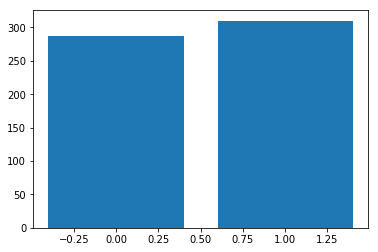

In [12]:
plt.bar(test['left'], test['average_montly_hours'])

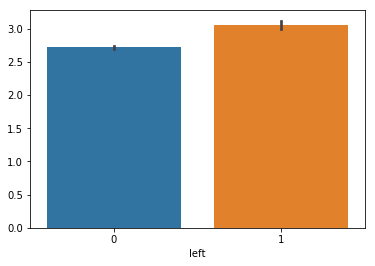

In [22]:
import seaborn as sns
sns.barplot(test['left'], test['number_project']*test['last_evaluation'])